In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display

#!pip install mglearn
import mglearn

# 경고메시지 무시
import warnings
warnings.filterwarnings(action = 'ignore') # action = 'default' 경고메시지 표시

## ggplot 스타일
mpl.style.use('ggplot')

# matplotlib 한글화
mpl.rcParams['font.family'] = 'D2coding'

# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# heart 데이터 셋 가져오기
- age: 나이
- sex: 성별 (여자 = 0, 남자 = 1)
- cp: 가슴 통증(chest pain) 종류
    - 0 : asymptomatic 무증상
    - 1 : atypical angina 비전형적 협심증
    - 2 : non-anginal pain 비협심증성 흉통
    - 3 : typical angina 전형적 협심증
- trestbps: (resting blood pressure) 휴식 중 혈압(mmHg)
- chol: (serum cholestoral) 혈중 콜레스테롤 (mg/dl)
- fbs: (fasting blood sugar) 공복 중 혈당 (120 mg/dl 이하일 시 = 0, 초과일 시 = 1)
- restecg: (resting electrocardiographic) 환자 안정시 심전도 결과
    - 0: 좌심실 비대증
    - 1: 정상
    - 2: 비정상 ST-T 파동
- thalach: (maximum heart rate achieved) 최대 심박수
- exang: (exercise induced angina) 활동으로 인한 협심증 여부 (없음 = 0, 있음 = 1)
- oldpeak: (ST depression induced by exercise relative to rest) 운동으로 인한 ST 하강
- slp: (the slope of the peak exercise ST segment) 최고 ST 분절 기울기
    - 0: downsloping 하강
    - 1: flat 평탄
    - 2: upsloping 상승
- ca: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개)
    - Null값은 숫자 4로 인코딩됨
- thal: thalassemia 지중해빈혈 여부(심장 결손)
    - 0 = Null
    - 1 = normal 정상
    - 2 = fixed defect 고정 결함
    - 3 = reversable defect 가역 결함
- target: 심장 질환 진단 여부
    - 0: < 50% diameter narrowing
    - 1: > 50% diameter narrowing

In [2]:
# heart 데이터 가져오기
heart = pd.read_csv('C:/k_digital/source/data/heart.csv')
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart['thall'].unique()

array([1, 2, 3, 0], dtype=int64)

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# 카테고리형, 연속형, 타겟 컬럼으로 분리하기
cat_cols = ['sex', 'exng' ,'caa','cp','fbs','restecg','slp','thall'] # 카테고리형 
con_cols = ["age","trtbps","chol","thalachh","oldpeak"] # 연속형
target_col = ["output"]

In [6]:
# 연속형 데이터 간의 상관계수
con_target = ["age","trtbps","chol","thalachh","oldpeak", "output"]
heart_corr = heart[con_target].corr()
heart_corr
# thalachh(최대심박수)가 심장질환 유발에 영향을 미칠것으로 보임.

,age,trtbps,chol,thalachh,oldpeak,output
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
output,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [7]:
# 카테고리형 데이터 간의 상관계수
cat_target = ['sex', 'exng' ,'caa','cp','fbs','restecg','slp','thall', 'output']
heart_corr2 = heart[cat_target].corr().transpose()
heart_corr2
# cp(가슴통증)와 slp(최대 ST 분절 기울기)가 심장질환 유발에 영향을 미칠것으로 보임.

,sex,exng,caa,cp,fbs,restecg,slp,thall,output
sex,1.000000,0.141664,0.118261,-0.049353,0.045032,-0.058196,-0.030711,0.210041,-0.280937
exng,0.141664,1.000000,0.115739,-0.394280,0.025665,-0.070733,-0.257748,0.206754,-0.436757
caa,0.118261,0.115739,1.000000,-0.181053,0.137979,-0.072042,-0.080155,0.151832,-0.391724
cp,-0.049353,-0.394280,-0.181053,1.000000,0.094444,0.044421,0.119717,-0.161736,0.433798
fbs,0.045032,0.025665,0.137979,0.094444,1.000000,-0.084189,-0.059894,-0.032019,-0.028046
restecg,-0.058196,-0.070733,-0.072042,0.044421,-0.084189,1.000000,0.093045,-0.011981,0.137230
slp,-0.030711,-0.257748,-0.080155,0.119717,-0.059894,0.093045,1.000000,-0.104764,0.345877
thall,0.210041,0.206754,0.151832,-0.161736,-0.032019,-0.011981,-0.104764,1.000000,-0.344029
output,-0.280937,-0.436757,-0.391724,0.433798,-0.028046,0.137230,0.345877,-0.344029,1.000000


## 데이터 전처리

In [8]:
#전처리를 위해 get_dummies()사용 => one-hot encoding
# heart데이터에서 더미데이터를 만들 컬럼은 범주형 데이터를 가지고 있는 컬럼
# drop_first = True는 해당컬럼의 더미 열을 N-1개 생성. False면 N개 
heart = pd.get_dummies(heart, columns=cat_cols, drop_first=True)
heart.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,exng_1,caa_1,caa_2,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


## 스케일링
- MinMaxSclaer는 매우 다른 스케일의 범위를 0과 1사이로 변환

- StandardScalar는 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 함

    - 이 방법은 특성의 최솟값과 최댓값 크기를 제한하지 않음

- RobustScaler는 특성들이 같은 스케일을 갖게 되지만 평균대신 중앙값을 사용 ==> 극단값에 영향을 받지 않음

- Nomalizer는 uclidian의 길이가 1이 되도록 데이터 포인트를 조정 ==> 각도가 많이 중요할 때 사용

- fit_transform()
    - fit_transform()은 train dataset에서만 사용
    - 우리가 만든 모델은 train data에 있는 mean과 variance를 학습
    - 이렇게 학습된 Scaler()의 parameter는 test data를 scale하는데 사용
    - 다시말해 train data로 학습된 Scaler()의 parameter를 통해 test data의 feature 값들이 스케일 
- transform()
- train data로부터 학습된 mean값과 variance값을 test data에 적용하기 위해 transform() 메서드를 사용

In [9]:
X = heart.drop(['output'], axis=1) # input 데이터
y = heart[['output']] # target 데이터

scaler = RobustScaler()

# fit_transform함수는 훈련용 데이터에만 적용
X[con_cols] = scaler.fit_transform(X[con_cols])
X.head()

# 연속형 데이터들이 정규화가 되었음을 확인할 수 있다. 

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


## 훈련세트와 테스트세트로 분리

In [10]:
# 데이터를 훈련세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀

## 로지스틱 회귀 모델 생성

In [11]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_proba = lr.predict_proba(X_test)  #predict_proba : 예측확률
y_pred = np.argmax(y_pred_proba, axis=1)  #np.argmax : 최댓값의 색인 위치 (0:음성, 1:양성)

print('테스트 데이터의 예측 확률 : ', y_pred_proba)
print('테스트 데이터로 예측한 값 분류 : ', y_pred)

테스트 데이터의 예측 확률 :  [[0.9736568  0.0263432 ]
 [0.55194969 0.44805031]
 [0.36270083 0.63729917]
 [0.97596468 0.02403532]
 [0.06223065 0.93776935]
 [0.07767471 0.92232529]
 [0.36001742 0.63998258]
 [0.99374037 0.00625963]
 [0.98614617 0.01385383]
 [0.43332286 0.56667714]
 [0.45963983 0.54036017]
 [0.88542149 0.11457851]
 [0.0780065  0.9219935 ]
 [0.94520551 0.05479449]
 [0.0155669  0.9844331 ]
 [0.05010332 0.94989668]
 [0.02273689 0.97726311]
 [0.95890043 0.04109957]
 [0.99245422 0.00754578]
 [0.98459819 0.01540181]
 [0.57737072 0.42262928]
 [0.92160704 0.07839296]
 [0.62680473 0.37319527]
 [0.2520748  0.7479252 ]
 [0.18065773 0.81934227]
 [0.38102038 0.61897962]
 [0.12397964 0.87602036]
 [0.29516034 0.70483966]
 [0.95643204 0.04356796]
 [0.04683419 0.95316581]
 [0.97601209 0.02398791]
 [0.97138187 0.02861813]
 [0.99043313 0.00956687]
 [0.820292   0.179708  ]
 [0.15195115 0.84804885]
 [0.962519   0.037481  ]
 [0.24116498 0.75883502]
 [0.12580455 0.87419545]
 [0.383131   0.616869  ]
 [0.112

In [12]:
# accuracy_score( ) : 정답률(정확도)
# 실제 데이터 중 맞게 예측한 데이터의 비율을 뜻한다
accuracy_score(y_test, y_pred)

0.9016393442622951

## 회귀방정식 구하기와 시그모이드 그래프 그리기

In [13]:
print('회귀계수 : {}'.format(lr.coef_), 
      '\n절편 : {}'.format(lr.intercept_))

회귀계수 : [[ 0.10222306 -0.32165753 -0.11362234  0.43671415 -0.78679113 -1.16650505
  -0.85158796 -1.68480297 -1.85766047 -1.07195384  0.47427858  0.47744138
   1.30733244  1.33546411  0.32730374  0.34202436 -0.04974582 -0.41530375
   0.61600743  0.19691245  0.52945121 -0.77391356]] 
절편 : [1.13495055]


In [14]:
# z값 계산
decisions = lr.decision_function(X_test[:30])
decisions

array([-3.60984871, -0.20855136,  0.56366085, -3.70390207,  2.71265631,
        2.47436818,  0.57528855, -5.06735415, -4.26524259,  0.26830664,
        0.16179271, -2.04480355,  2.46974601, -2.84781279,  4.14691934,
        2.94226585,  3.76076708, -3.14978967, -4.87919294, -4.15774873,
       -0.31198917, -2.4643848 , -0.51853327,  1.0875771 ,  1.51189764,
        0.48521947,  1.95527199,  0.87045161, -3.08888779,  3.01317545])

In [15]:
# 시그모이드 함수를 통해 확률값 추출
from scipy.special import expit

# 양성일 확률(1일 확률)
print('양성일 확률(1일 확률) : {}'.format(expit(decisions)))

# 음성일 확률(0일 확률)
print('\n음성일 확률(0일 확률) : {}'.format(1 - expit(decisions)))

양성일 확률(1일 확률) : [0.0263432  0.44805031 0.63729917 0.02403532 0.93776935 0.92232529
 0.63998258 0.00625963 0.01385383 0.56667714 0.54036017 0.11457851
 0.9219935  0.05479449 0.9844331  0.94989668 0.97726311 0.04109957
 0.00754578 0.01540181 0.42262928 0.07839296 0.37319527 0.7479252
 0.81934227 0.61897962 0.87602036 0.70483966 0.04356796 0.95316581]

음성일 확률(0일 확률) : [0.9736568  0.55194969 0.36270083 0.97596468 0.06223065 0.07767471
 0.36001742 0.99374037 0.98614617 0.43332286 0.45963983 0.88542149
 0.0780065  0.94520551 0.0155669  0.05010332 0.02273689 0.95890043
 0.99245422 0.98459819 0.57737072 0.92160704 0.62680473 0.2520748
 0.18065773 0.38102038 0.12397964 0.29516034 0.95643204 0.04683419]


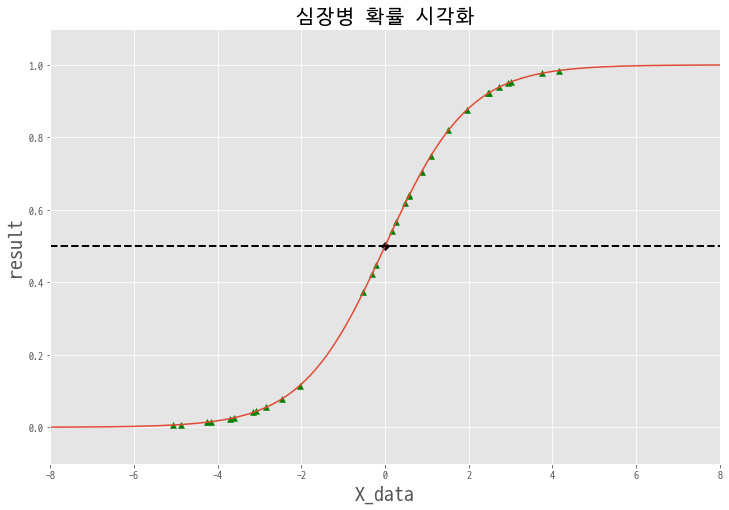

In [16]:
# 시그모이드 함수 시각화
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x_data = np.arange(-10, 10, 0.1)
result = sigmoid(x_data)
plt.figure(figsize=(12, 8))
plt.plot(x_data, result)
plt.scatter(decisions, expit(decisions), marker='^' ,color = 'g')
plt.scatter(0, 0.5, marker = 'D', color = 'black')
plt.axhline(0.5, 0, 1, color='black', linestyle='--', linewidth=2)
plt.title('심장병 확률 시각화', size = 20)
plt.xlabel('X_data', size = 20)
plt.ylabel('result', size = 20)
plt.xlim(-8, 8)
plt.ylim(-0.1, 1.1)
plt.show()

## ROC커브 그래프 시각화와 하단 면적 구하기

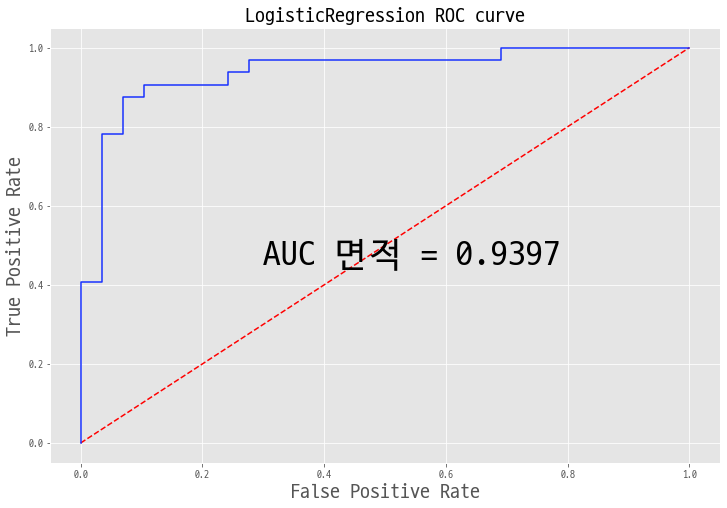

In [33]:
y_pred_prob = y_pred_proba[:,1] # 양성(심장병 발병)으로 예측할 확률을 들고온다. 

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(12, 8))
plt.plot([0,1], [0,1], "r--")
plt.plot(fpr, tpr, label='LogisticRegression', color = '#162fff')
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title('LogisticRegression ROC curve', size = 20)
plt.text(0.3, 0.45, 'AUC 면적 = {}'.format(round(roc_auc_score(y_test, y_pred_prob), 4)), size = 35)
plt.show()

In [19]:
print('1. False Positive Rate(양성이라 예측한 것의 실제값이 음성일 확률) : \n{}\n'.format(fpr))
print('2. True Positive Rate(양이라 예측한 것의 실제값이 양성일 확률) : \n{}\n'.format(tpr))
print('3. AUC 면적(ROC커브의 하단 면적) : ', roc_auc_score(y_test, y_pred_prob)) # 면적이 1에 가까울수록 좋다. 

1. False Positive Rate(참이라 예측한 것의 실제값이 거짓일 확률) : 
[0.         0.         0.         0.03448276 0.03448276 0.06896552
 0.06896552 0.10344828 0.10344828 0.24137931 0.24137931 0.27586207
 0.27586207 0.68965517 0.68965517 1.        ]

2. True Positive Rate(참이라 예측한 것의 실제값이 참일 확률) : 
[0.      0.03125 0.40625 0.40625 0.78125 0.78125 0.875   0.875   0.90625
 0.90625 0.9375  0.9375  0.96875 0.96875 1.      1.     ]

3. AUC 면적(ROC커브의 하단 면적) :  0.9396551724137931


# 의사결정나무

In [32]:
# DecisionTreeClassfier 모델사용해서 점수 확인
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('정확도 점수 : {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('훈련데이터의 정확도 점수 :', dt.score(X_train, y_train))
print('테스트데이터의 정확도 점수 : ',dt.score(X_test, y_test))
print('과대적합이 의심된다')

정확도 점수 : 0.787
훈련데이터의 정확도 점수 : 1.0
테스트데이터의 정확도 점수 :  0.7868852459016393
과대적합이 의심된다


## 그리드 서치

In [22]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state = 42)

params = {
    'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10],    
    'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9, 10]
}

gs = GridSearchCV(model, param_grid = params, cv = 3, refit = True, n_jobs = -1) # n_jobs는 실행 코어수 조절(-1을 주면 모든 코어 사용)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [26]:
# 그리드 서치를 사용한 모델의 최적의 파라미터값
model = gs.best_estimator_
print('1. 그리드 서치를 이용한 최적의 매게변수 : ', gs.best_params_)
print('2. 그리드 서치를 이용한 최적의 매게변수 점수 : {:.3f}'.format(gs.best_score_))
print('3. 최적의 교차검증 점수 : {:.3f}'.format(np.max(gs.cv_results_['mean_test_score'])))
print('4. 훈련데이터 점수 : {:.3f}'.format(model.score(X_train, y_train)))
print('5. 테스트데이터 점수 : {:.3f}'.format(model.score(X_test, y_test)))
print('6. 결론 : 그럼에도 불구하고 과대적합이 의심된다.')

1. 그리드 서치를 이용한 최적의 매게변수 :  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
2. 그리드 서치를 이용한 최적의 매게변수 점수 : 0.740
3. 최적의 교차검증 점수 : 0.740
4. 훈련데이터 점수 : 0.905
5. 테스트데이터 점수 : 0.754
6. 결론 : 그럼에도 불구하고 과대적합이 의심된다.
